<a href="https://colab.research.google.com/github/GuCuChiara/Modelo-Regresion-Logistica-Titanic-Dataset/blob/main/Modelo_Regresion_Logistica_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística utilizando el dataset Titanic y Scikit-learn (sklearn)

In [ ]:
#montamos nuestra unidad de google drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')
# dataset para descargar: https://drive.google.com/file/d/1m3ycg_6Sdy2hxUbQRM5Ka0KTJEHVdP3q/view?usp=drive_link

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* La columna **Survived** es lo que estamos tratando de predecir.

* A esta la llamamos **target** o **variable objetivo**.

* Podemos ver que es una lista de 1 y 0.

* Un 1 significa que el pasajero sobrevivió y un 0 significa que el pasajero no sobrevivió.

* Las columnas restantes son la información sobre los pasajeros que podemos usar para predecir el objetivo, constituyen las variables dependientes.

* A cada una de estas columnas la llamamos **features**.

* Los **features** son los datos que utilizamos para hacer nuestra predicción.

* Si bien sabemos si cada pasajero en el conjunto de datos sobrevivió, nos gustaría poder hacer predicciones sobre pasajeros adicionales para los cuales no pudimos recopilar esos datos.

* Construiremos un modelo de aprendizaje automático para ayudarnos a hacer esto.

* Las **features** son conocidas también como **predictores**.

In [ ]:
# Primero, necesitamos hacer que todas nuestras columnas sean numéricas.
# Creamos una columna boolean para la variable Sexo (Sex).
df['male'] = df['Sex'] == 'male'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True




---



## Creamos un modelo básico de prueba:

Tomamos las features y creamos un array numpy llamado **X**.

Primero seleccionamos todas las columnas que nos interesan y luego usamos el método **.values** para convertirlas en una matriz numpy.

In [ ]:
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
print(X)

[[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 ...
 [1 False 19.0 0 0 30.0]
 [1 True 26.0 0 0 30.0]
 [3 True 32.0 0 0 7.75]]


* Ahora tomamos la variable **target** (la columna **Survived**) y la almacenamos en la variable **y**.

In [ ]:
y = df['Survived'].values[:50] # mostramos sólo los primeros 50
print(y)

[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1]


In [ ]:
# comenzamos importando Logistic Regression model:
from sklearn.linear_model import LogisticRegression

In [ ]:
# todos los modelos sklearn están construidos como clases de Python.
# primero instanciamos la clase:
model = LogisticRegression()

Ahora podemos usar nuestros datos que preparamos previamente para entrenar el modelo.

Para simplificar, supongamos primero que estamos creando un modelo de regresión logística utilizando solo las columnas Fare (Tarifa) y Age (Edad).

Primero definimos
*  **X** como la matriz de features, e
*  **y** la matriz objetivo:

In [ ]:
X = df[['Fare', 'Age']].values
y = df['Survived'].values

* El método **fit** es usado para construir el modelo.
* **Se toman 2 argumentos:**
1. **X** (the features)
2. **y** (the target).

In [ ]:
# Now we use the fit method to build the model.
model.fit(X, y)

LogisticRegression()

Hacemos predicciones con el modelo, utilizando **model.predict**

In [ ]:
model.predict(X)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

El método **.predict** devuelve una matriz de unos y ceros, donde:
* 1 significa que el modelo predice que el pasajero sobrevivió y
* 0 significa que el modelo predice que el pasajero no sobrevivió.



---



## Reconstruyamos el modelo con todas las features:

In [ ]:
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

### Vemos la predicción de nuestro modelo:

In [ ]:
prediccion= model.predict(X[:5])
original= y[:5]
print('Mostramos resultados de los primeros 5 valores:')
print(f'Esta es la información de las variables target del dataset original:{original}')
print(f'Esta es la predicción de nuestro modelo:{prediccion}')


Mostramos resultados de los primeros 5 valores:
Esta es la información de las variables target del dataset original:[0 1 1 1 0]
Esta es la predicción de nuestro modelo:[0 1 1 1 0]


## Evaluamos el accuracy:

In [ ]:
y_pred = model.predict(X) #creamos un array con nuestras predicciones

In [ ]:
# Ahora creamos una matriz de valores booleanos
# para determinar si nuestro modelo predijo correctamente a cada pasajero:
#y == y_pred

# Mostrar solo los primeros 20 valores del array
for i in range(min(20, len(y))):
    print("Valor real:", y[i], "| Valor predicho:", y_pred[i], "| Coincide:", y[i] == y_pred[i])

Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 0 | Valor predicho: 1 | Coincide: False
Valor real: 1 | Valor predicho: 1 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 0 | Valor predicho: 0 | Coincide: True
Valor real: 1 | Valor predicho: 0 | Coincide: False
Valor real: 1 | Valor predich

## Visualizamos el total de predicciones:

In [ ]:
tot= y.size # podemos usar también: y.shape[0]
print(f'la cantidad total de predicciones es: {tot}')

la cantidad total de predicciones es: 714



### Para obtener el número de predicciones verdaderas, usamos el método **sum** de la librería numpy:

In [ ]:
tot_true= (y == y_pred).sum()
print(f'la cantidad total de predicciones verdaderas es: {tot_true}')

la cantidad total de predicciones verdaderas es: 573



Esto significa que de los 714 datos,

el modelo hace la predicción correcta de la cantidad que visualizamos en la variable **tot_true**.

Para obtener el porcentaje correcto, lo dividimos por el número total de pasajeros.

Obtenemos el número total de pasajeros usando el atributo **.shape**.

In [ ]:
my_score = tot_true / y.shape[0]
print(my_score)
print(f'El accuracy de nuestro modelo es {round(my_score*100,2)}%')
print (f'Nuestro modelo hizo una predicción correcta del {round(my_score*100)}% sobre el total de datos')

0.8025210084033614
El accuracy de nuestro modelo es 80.25%
Nuestro modelo hizo una predicción correcta del 80% sobre el total de datos


Este cálculo **sklearn** ya lo ha implementado para nosotros.

Entonces podemos obtener el mismo resultado usando el método **.score**.

El método **.score** utiliza el modelo para hacer una predicción para **X**

y cuenta qué porcentaje de ellos coincide con **y**.

In [ ]:
print(f'sklearn model.score: {model.score(X,y)}')

sklearn model.score: 0.8025210084033614




---



## Calculando métricas con Scikit-learn:

##Accuracy, Precision, Recall & F1 Score in Sklearn

Scikit-learn has a function built in for each of the metrics that we have introduced.

We have a separate function for each of the accuracy, precision, recall and F1 score.

In order to use them, let’s start by recalling our code from the previous module to build a Logistic Regression model.

The code reads in the Titanic dataset from the csv file and puts it in a Pandas DataFrame.

Then we create a feature matrix X and target values y.

We create a Logistic Regression model and fit it to our dataset.

Finally, we create a variable y_pred of our predictions.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))

accuracy: 0.8025210084033614
precision: 0.7769516728624535
recall: 0.7206896551724138
f1 score: 0.7477638640429337


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[364  60]
 [ 81 209]]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Supongamos que y y y_pred son arrays de predicciones
# Generemos valores de ejemplo
#y = np.random.randint(0, 2, size=100)
#y_pred = np.random.randint(0, 2, size=100)

# Calculamos la matriz de confusión
cm = confusion_matrix(y, y_pred)

# Imprimimos la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Calculamos los índices de la matriz de confusión
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Calculamos las métricas
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Imprimimos los índices
print("-----------------------------------------------------------------------------")
print("Índices:")
print("-----------------------------------------------------------------------------")
print("Exactitud (Accuracy):", accuracy)
print("Calculo del Accuracy: = (TP + TN) / (TP + TN + FP + FN) == total de predicciones / todos los datos")
print (f'\nNuestro modelo hizo una predicción correcta del {round(accuracy*100)}% sobre el total de datos')
print("-----------------------------------------------------------------------------")
print("Precisión (Precision):", precision)
print("Calculo de precision: = TP / (TP + FP)")

print("\nLa precisión es el porcentaje de predicciones positivas del modelo que son correctas")
print("Es una medida de qué tan preciso es el modelo con sus predicciones positivas.")
print (f'\nNuestro modelo tiene una predicción correcta del {round(precision*100)}% sobre el total de datos positivos')
print("-----------------------------------------------------------------------------")
print("Recall (Sensibilidad):", recall)
print("Calculo de Recall: = TP / (TP + FN)")
print("\nRecall es el porcentaje de casos positivos que el modelo predice correctamente.")
print (f'\nNuestro modelo predijo correctamente el {round(recall*100)}% de los datos positivos')
print("-----------------------------------------------------------------------------")
print("F1-Score:", f1_score)
print("Calculo del F1_Score = 2 * (precision * recall) / (precision + recall)")

print("\nF1-Score es un promedio entre precision y recall para que tengamos una puntuación única para nuestro modelo.")
print("F1-Score es la media armónica de los valores de precision y recall.")
print (f'\nNuestro modelo predijo un F1-Score del {round(f1_score*100)}%')
print("-----------------------------------------------------------------------------")


Matriz de Confusión:
[[364  60]
 [ 81 209]]
-----------------------------------------------------------------------------
Índices:
-----------------------------------------------------------------------------
Exactitud (Accuracy): 0.8025210084033614
Calculo del Accuracy: = (TP + TN) / (TP + TN + FP + FN) == total de predicciones / todos los datos

Nuestro modelo hizo una predicción correcta del 80% sobre el total de datos
-----------------------------------------------------------------------------
Precisión (Precision): 0.7769516728624535
Calculo de precision: = TP / (TP + FP)

La precisión es el porcentaje de predicciones positivas del modelo que son correctas
Es una medida de qué tan preciso es el modelo con sus predicciones positivas.

Nuestro modelo tiene una precisión del 78% sobre el total de datos positivos
-----------------------------------------------------------------------------
Recall (Sensibilidad): 0.7206896551724138
Calculo de Recall: = TP / (TP + FN)

Recall es el por

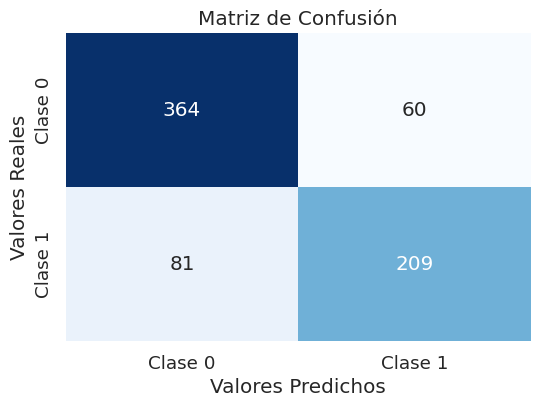

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supongamos que y y y_pred son arrays de predicciones
# Generemos valores de ejemplo
#y = np.random.randint(0, 2, size=100)
#y_pred = np.random.randint(0, 2, size=100)

# Calculamos la matriz de confusión
cm = confusion_matrix(y, y_pred)

# Definimos las etiquetas de las clases
classes = ['Clase 0', 'Clase 1']

# Creamos el heatmap
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Ajustamos el tamaño de la fuente
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()




---



##Lidiando con el Overfitting:

**Overfitting** es cuando nos desempeñamos bien con los datos que el modelo ya ha visto, pero no nos desempeñamos bien con los datos nuevos.

Creamos un modelo con todos nuestros datos y luego vimos qué tan bien funcionó con los mismos datos.

Esto está inflando artificialmente nuestros números ya que nuestro modelo, de hecho, pudo ver las respuestas del cuestionario antes de que se lo entregáramos.

## Training Set & Test Set

Para darle a un modelo una evaluación justa, nos gustaría saber qué tan bien se desempeñaría nuestro modelo con datos que aún no ha visto.

**Para simular la realización de predicciones sobre nuevos datos que el modelo no ha visto, podemos dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.**

Porl lo tanto el set de datos de entrenamiento: **(training set)** es usado para construir el modelo.

El set de datos de prueba **(test set)**  será usado para evaluar el rendimiento de nuestro modelo.

Dividimos nuestros datos antes de construir el modelo, por lo que el modelo no tiene conocimiento del conjunto de prueba y le daremos una evaluación justa.

**Si nuestro conjunto de datos tiene 200 puntos de datos, dividirlo en un conjunto de entrenamiento y un conjunto de prueba podría verse de la siguiente manera.**

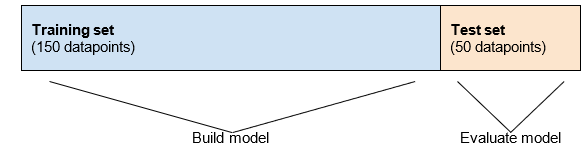

* Un esquema estándar es colocar:
  * entre el **70% y el 80% de nuestros datos en el conjunto de entrenamiento** y,
  * entre el **20% y el 30% en el conjunto de prueba**.

* Usar menos datos en el conjunto de entrenamiento significa que nuestro modelo no tendrá tantos datos de los cuales aprender, por lo que queremos darle la mayor cantidad posible y dejar suficiente para la evaluación.

## Training & Testing utilizando Sklearn:

* **Scikit-learn** tiene una función integrada para dividir los datos en un conjunto de entrenamiento y un conjunto de prueba.

* Suponiendo que tenemos una matriz numpy bidimensional **X** con nuestras features y una matriz numpy unidimensional **y** con la variable objetivo, podemos usar la función **train_test_split**.

* La misma colocará aleatoriamente cada punto de datos en el conjunto de entrenamiento o en el conjunto de prueba.

**Por defecto:**
  * el conjunto de entrenamiento es el 75% de los datos y
  * el conjunto de prueba es el 25% restante de los datos.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')

df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
# Podemos cambiar el tamaño de nuestro conjunto de entrenamiento usando el parámetro train_size.
# P.ej. train_test_split(X, y, train_size=0.6) colocaría el 60% de los datos en el conjunto de entrenamiento y el 40% en el conjunto de prueba.

# Usemos el atributo de .shape para ver los tamaños de nuestros conjuntos de datos
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)


whole dataset: (714, 6) (714,)
training set: (535, 6) (535,)
test set: (179, 6) (179,)


## Construimos el modelo con Scikit-learn y regresión logística utilizando el set de entrenamiento:

In [ ]:
# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluamos el modelo utilizando el conjunto de prueba.

In [ ]:
# evaluating the model
print("accuracy:", model.score(X_test, y_test))

accuracy: 0.8100558659217877


* De hecho, todas las métricas que calculamos en las partes anteriores deben calcularse en el conjunto de prueba.

* Nuestros valores de exactitud, precisión, recuperación y puntuación F1 son en realidad muy similares a los valores cuando utilizamos todo el conjunto de datos.

In [ ]:
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8100558659217877
precision: 0.7647058823529411
recall: 0.7428571428571429
f1 score: 0.7536231884057971


* Si ejecutamos todo el código anterior (desde el principio), notarmos que obtiene puntuaciones diferentes cada vez.

* Esto se debe a que la división entre prueba y entrenamiento se realiza de forma aleatoria y, dependiendo de qué puntos aparezcan en el conjunto de entrenamiento y en la prueba, las puntuaciones serán diferentes.

###Usando random_state:

* Como notamos en la parte anterior, cuando dividimos aleatoriamente los datos en un conjunto de entrenamiento y un conjunto de prueba, terminamos con diferentes datapoints en cada conjunto, cada vez que ejecutamos el código.

* Esto es el resultado de la aleatoriedad y necesitamos que sea aleatorio para que sea efectivo, pero esto a veces puede dificultar la prueba de nuestro código.

* Para obtener la misma división cada vez que ejecutamos, podemos usar el atributo **random_state**.

* Elegimos un número arbitrario para darle y luego, cada vez que ejecutamos el código, obtendremos la misma división.




In [ ]:
# vemos un ejemplo:

from sklearn.model_selection import train_test_split

X = [[1, 1], [2, 2], [3, 3], [4, 4]]
y = [0, 0, 1, 1]

# Para obtener la misma división cada vez, podemos usar el atributo random_state:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)
print('X_train', X_train)
print('X_test', X_test)

X_train [[3, 3], [1, 1], [4, 4]]
X_test [[2, 2]]


###random_state es también conocido como **seed**.



---



## Sensibilidad & Especificidad:

* Una **Curva ROC** (Receiver operating characteristic) es un gráfico de la sensibilidad frente a la especificidad.

* La **Sensibilidad (recall) es la tasa de verdaderos positivos**.
  * Sensitivity (TP / TP + FN)

* La **Especificidad es la tasa de verdaderos negativos**.
  * Specificity (TN / TN + FP)


## Sensibilidad & Especificidad con Scikit-learn:


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_recall_fscore_support

# Sensitivity is the same as recall, so it is easy to define.
sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

#df = pd.read_csv('/drive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = df['Survived'].values

# we use a random state in the train test split so that every time you run the code you will get the same results.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

sensitivity: 0.647887323943662
specificity: 0.8148148148148148


## La curva ROC (Receiver operating characteristic):


* La curva ROC muestra el rendimiento, no de un solo modelo, sino de muchos modelos.

* Cuanto más se acerque la curva a la esquina superior izquierda, mejor será el rendimiento.

* La línea nunca debe caer por debajo de la línea diagonal, ya que eso significaría que su rendimiento es peor que un modelo aleatorio.

* Scikit-learn tiene una función **roc_curve** que podemos usar.

* La función toma los valores objetivo verdaderos y las probabilidades predichas de nuestro modelo.

* Usamos el método **predict_proba** en el modelo para obtener las probabilidades.

* Luego llamamos a la función roc_curve.

* La función roc_curve devuelve una matriz de tasas de falsos positivos, una matriz de tasas de verdaderos positivos y los umbrales.

  * La tasa de falsos positivos es **1-especificidad (eje x)**,
  * la tasa de verdaderos positivos es la **sensibilidad (eje y)**.


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# df = pd.read_csv('/drive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

# Setting the threshold to 0.5 we would get the original Logistic Regression model.
# Any other threshold value yields an alternative model.
# y_pred = model.predict_proba(X_test)[:, 1] > 0.75



model 1 AUC score: 0.8299077733860342
model 2 AUC score: 0.8048089591567853


## Utilizamos matplotlib para generar las curvas ROC de los 2 modelos:

model 1 AUC score: 0.8423067269076305
model 2 AUC score: 0.8226656626506024


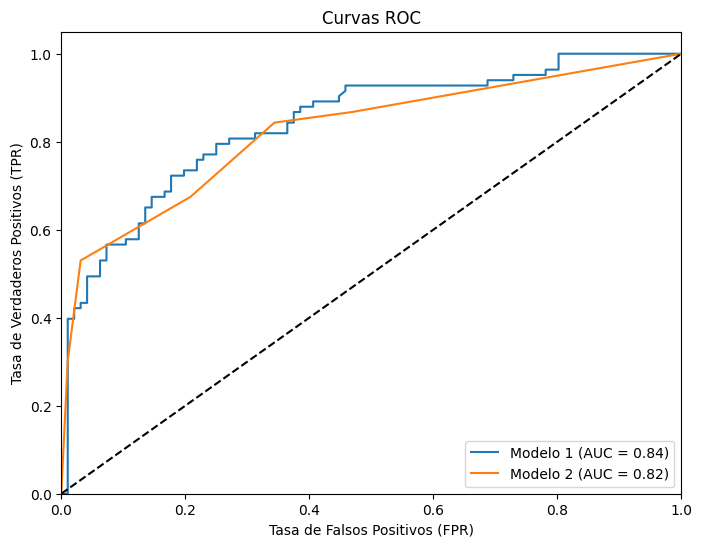

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# df = pd.read_csv('/drive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')

df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
auc1 = roc_auc_score(y_test, y_pred_proba1[:, 1])
print("model 1 AUC score:", auc1)

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
auc2 = roc_auc_score(y_test, y_pred_proba2[:, 1])
print("model 2 AUC score:", auc2)

# Calculamos la curva ROC para model1
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1[:, 1])

# Calculamos la curva ROC para model2
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2[:, 1])

# Graficamos las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Modelo 1 (AUC = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='Modelo 2 (AUC = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc="lower right")
plt.show()




---



### Múltiples Training & Test Sets:
En lugar de simplemente tomar una parte de los datos como conjunto de prueba, dividamos nuestro conjunto de datos en 5 partes.

Cada uno de estos 5 fragmentos servirá como conjunto de prueba.

Cuando el fragmento 1 es el conjunto de prueba, utilizamos los 4 fragmentos restantes como conjunto de entrenamiento.

Así tenemos 5 conjuntos de entrenamiento y prueba de la siguiente manera:

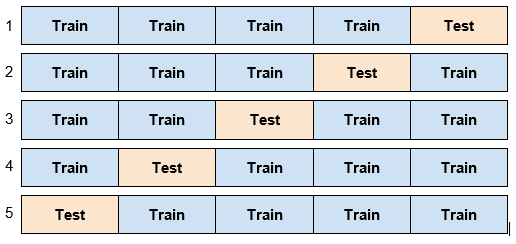


* Cada una de las 5 veces tenemos un conjunto de prueba del 20% (40 puntos de datos) y un conjunto de entrenamiento del 80%.

* Construimos 5 modelos y calculamos 5 puntuaciones.


* Digamos que estamos intentando calcular el accuracy de nuestros 5 modelos:

```
(0.83+0.79+0.78+0.80+0.75)/5 = 0.79
```

* Informamos el accuracy como la media de los 5 valores.

## Este proceso para crear múltiples conjuntos de entrenamiento y prueba se denomina **k-fold cross validation.**

* La **k** es la cantidad de fragmentos en los que dividimos nuestro conjunto de datos.

* El número estándar es 5, como hicimos en nuestro ejemplo anterior.

* El objetivo es obtener medidas precisas para nuestras métricas (accuracy, precision, recall).

* Creamos modelos adicionales para tener confianza en las cifras que calculamos e informamos.

## Construyendo el modelo:
* Podemos usar los conjuntos de entrenamiento y prueba para construir un modelo y hacer una predicción como antes.

* Utilizamos todo el conjunto de datos y como queremos recorrer todos los k-folds y así obtener sus respectivos valores, ponemos el código dentro de un bucle for.





Creamos una instancia de un objeto de clase KFold.

```
kf = KFold(n_splits=3, shuffle=True)
```

Se necesitan dos parámetros:

* **n_splits** (esto es **k**, el número de fragmentos a crear) y
* **shuffle** (si aleatorizar o no el orden de los datos).

En general, es una buena práctica mezclar los datos, ya que a menudo se obtiene un conjunto de datos ordenado.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
y = df['Survived'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[0.8321678321678322, 0.7832167832167832, 0.7902097902097902, 0.7972027972027972, 0.8028169014084507]


* Como tenemos 5 k-folds, obtenemos 5 valores de precisión.

* Para obtener un valor final único, debemos tomar la media de esos valores:

In [ ]:
import numpy as np
print(np.mean(scores))

0.8011228208411307



### Comparando diferentes modelos:


* Construimos dos modelos en scikit-learn.
* Luego usamos una validación cruzada de k veces para calcular la exactitud, la precisión, la recuperación y la puntuación F1 de los dos modelos para poder compararlos.
* Construimos el objeto KFold, usamos 5 divisiones como estándar.
* Creamos tres matrices de características diferentes **X1, X2 y X3**.
* Todas tendrán el mismo objetivo **y**.
* Como lo haremos varias veces, escribimos una función (**score_model**) para calificar el modelo.
* Esta función utiliza el objeto KFold para calcular las métricas para un modelo de regresión logística con la matriz de características X y la matriz objetivo y dadas.
* Luego llamamos a nuestra función tres veces para cada una de nuestras tres matrices de características y vemos los resultados.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Science/data/titanic_train_del_NAN.csv')
df['male'] = df['Sex'] == 'male'

#Construimos el objeto KFold
kf = KFold(n_splits=5, shuffle=True)

#Creamos tres matrices
X1 = df[['Pclass', 'male', 'Age', 'SibSp', 'Parch', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

#Función (score_model) para calificar el modelo.
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

# Llamamos a nuestra función score_model tres veces para cada una de nuestras tres matrices
print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.788555106864966
precision: 0.7515939421202578
recall: 0.7152116402116403
f1 score: 0.7314588761857878

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7982763715158081
precision: 0.762672910936484
recall: 0.7339753675413219
f1 score: 0.7447557343498261

Logistic Regression with Fare & Age features
accuracy: 0.6526839357825274
precision: 0.667675293826189
recall: 0.29565247529743893
f1 score: 0.4033810348723357


* El tercer modelo no tiene acceso al sexo del pasajero.
* Nuestra expectativa es que las mujeres tienen más probabilidades de sobrevivir, por lo que tener esa variable constituye un predictor muy valioso.